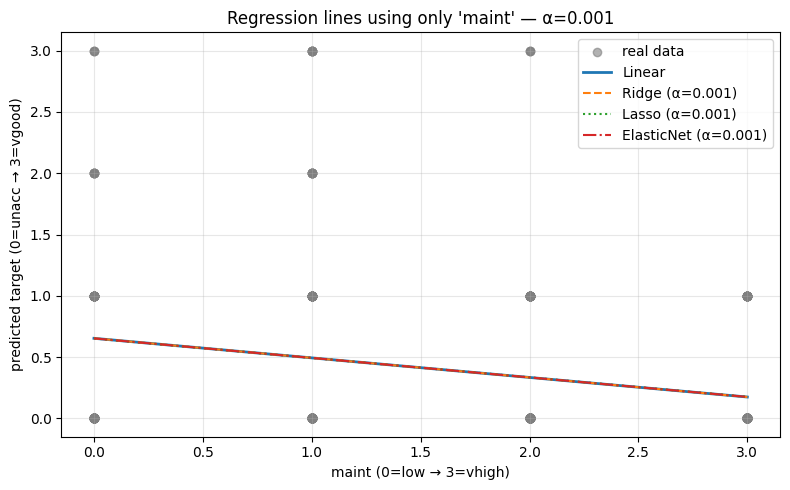

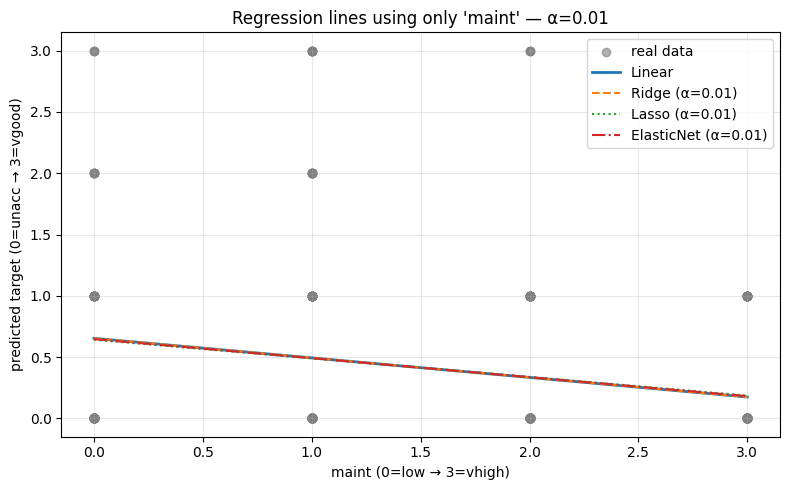

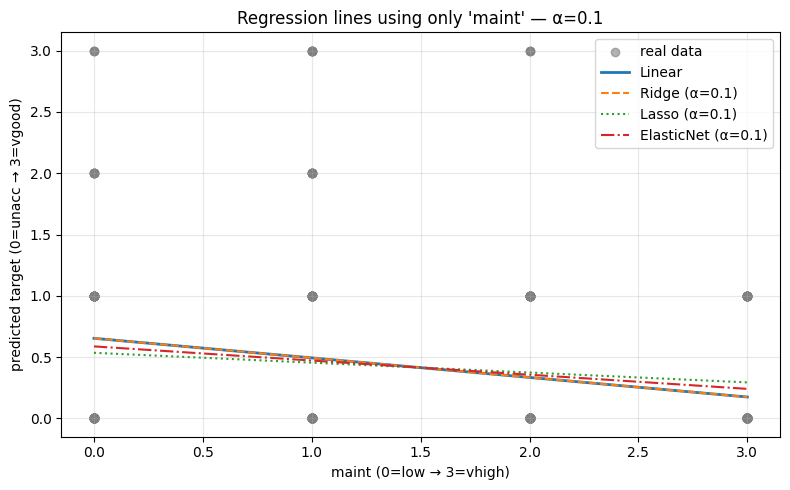

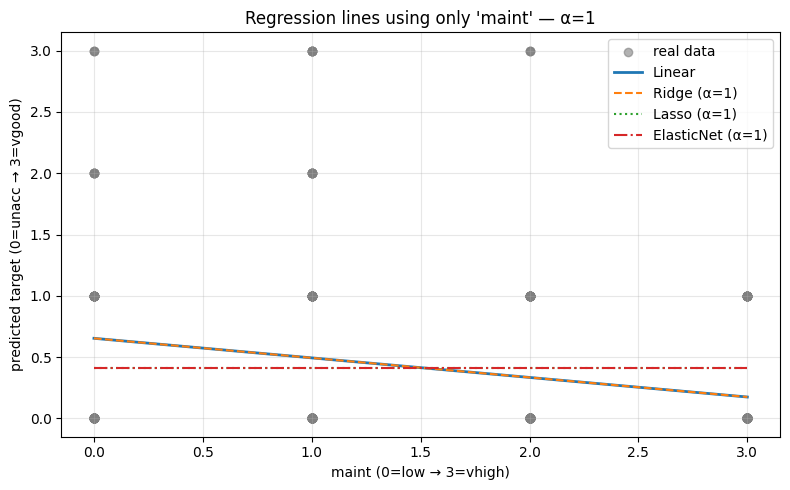

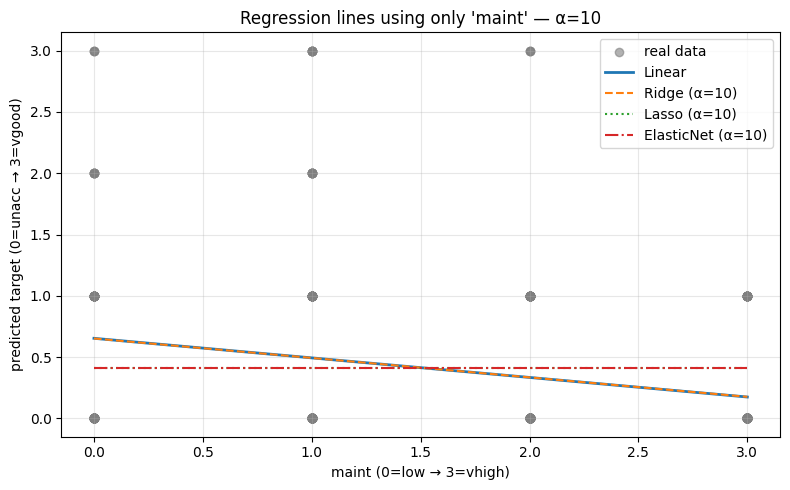

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Load dataset
CSV_PATH = r"C:\Users\emi_g\ML2025\mlct\data\external\car.data"
df = pd.read_csv(CSV_PATH, header=None,names=["buying","maint","doors","persons","lug_boot","safety","class"])

# Map maintenance level (feature) and class (target)
ord_map = {"low":0, "med":1, "high":2, "vhigh":3}
df["maint_num"] = df["maint"].map(ord_map)

# Use only the feature 'maint'
X = df[["maint_num"]].values
y = df["class"].values

# Split data
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train linear model
lin = LinearRegression().fit(X_tr, y_tr)

# Regularization strengths
alphas = [0.001, 0.01, 0.1, 1, 10]

# Create line for regression visualization
x_min, x_max = X.min(), X.max()
X_line = np.linspace(x_min, x_max, 100).reshape(-1, 1)

# Scatter data
x_scatter = X_te
y_scatter = y_te

# Loop over alphas
for a in alphas:
    ridge = Ridge(alpha=a, random_state=42).fit(X_tr, y_tr)
    lasso = Lasso(alpha=a, max_iter=200000, random_state=42).fit(X_tr, y_tr)
    enet  = ElasticNet(alpha=a, l1_ratio=0.5, max_iter=200000, random_state=42).fit(X_tr, y_tr)

    # Predictions for line
    y_lin   = lin.predict(X_line)
    y_ridge = ridge.predict(X_line)
    y_lasso = lasso.predict(X_line)
    y_enet  = enet.predict(X_line)

    # Plot scatter + regression lines
    plt.figure(figsize=(8,5))
    plt.scatter(x_scatter, y_scatter, color="gray", alpha=0.6, label="real data")
    plt.plot(X_line, y_lin,   label="Linear", linewidth=2)
    plt.plot(X_line, y_ridge, '--', label=f"Ridge (α={a})")
    plt.plot(X_line, y_lasso, ':',  label=f"Lasso (α={a})")
    plt.plot(X_line, y_enet,  '-.', label=f"ElasticNet (α={a})")
    plt.xlabel("maint (0=low → 3=vhigh)")
    plt.ylabel("predicted target (0=unacc → 3=vgood)")
    plt.title(f"Regression lines using only 'maint' — α={a}")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
